# Sentiment Analysis: Large Movie Review Dataset

This project is related to NLP. As you may already know, the most important and hardest part of an NLP project is pre-processing, which is why we are going to focus on that.

### Getting the data

To access the data for this project, you only need to execute the code below. This will download three files:

- `movies_review_train_aai.csv`: Training dataset you must use to train and find the best hyperparameters on your model.

- `movies_review_test_aai.csv`: Test dataset to test your model.

Basically a basic sentiment analysis problem, as in this case, consists of a classification problem, where the possible output labels are: `positive` and `negative`. Which indicates, if the review of a movie speaks positively or negatively. In our case it is a binary problem, but one could have many more "feelings" tagged and thus allow a more granular analysis.

### These are the objectives of the project:

* Read data that is not in a traditional format.
* Put together a set of preprocessing functions that we can use later on any NLP or related problems.
* Vectorize the data in order to apply a machine learning model to it: using BoW or TF-IDF.
* BoW and TF-IDF are classic ways to vectorize text, but currently we have some more complex ways with better performance, for this we are going to train our own word embedding and use it as a vectorization source for our data.
* Train a sentiment analysis model that allows us to detect positive and negative opinions in movie reviews.

---
## 1. Get the data

**Download the data by executing the code below:**

`Notes:` Use the target column as `positive`, that way the positive value will be indicated with a value of `1` and negative with a value of `0`. In this case, a split train/test is not necessary because the original data is already separated.

In [103]:
from src import data_utils
from imp import reload
import os
import pickle
import sys
import numpy as np
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import ToktokTokenizer
from sklearn.cluster import KMeans
import nltk


sys.path.append(os.path.dirname(os.getcwd()))

from src import word2vec
from src import evaluation
from src import text_normalizer

np.random.seed(42)

train, test = data_utils.get_datasets()

In [74]:
reload(data_utils)

# TODO Complete in this cell: Complete the function `split_data()` but not here in
# the notebook, do it in the python module called `data_utils.py`.
# Then make sure this code runs without errors.
X_train, y_train, X_test, y_test = data_utils.split_data(train, test)

---
## 2. Normalize the data

**Create the following functions but not here in the notebook, do it in the python script called `text_normalizer.py` and import them into the notebook (this way you can build your own NLP preprocessing library). In fact, the structure of the functions is already written, you must complete them with the code that you consider necessary.**

- `remove_html_tags(text):` to remove all HTML tags that may be present in text.
- `remove_accented_chars(text):` to remove accented characters from text
- `expand_contractions(text):` to expand contractions of the type, "don't" to "do not". The contractions are already defined in the "contractions.py" file.
- `lemmatize_text(text):` to lemmatize text.
- `stem_text(text):` to apply stemming (NLTK's PorterStemmer) on text.
- `remove_special_chars(text):` to remove special characters from text.
- `remove_special_chars(text, remove_digits=True):` to remove numbers, note that it is the same function to remove special characters with the addition of an argument that enables or disables the removal of numbers.
- `remove_stopwords(text, stopwords=stop_words):` to remove stopwords from text.
- `remove_extra_new_lines(text):` to remove extra newlines from text.
- `remove_extra_whitespace(text):` to remove extra whitespaces from text.

If you want to add more features that would be great, for example you could start by removing emojis, using different stemming algorithms, etc. The more functions you have the better, remember that the texts are very varied and the preprocessing depends a lot on the source of our data.

To apply each of the functions you created and pre-process the dataset, you must use the `normalize_corpus()` function of the `text_normalizer.py` script. In this method each of the functions you wrote is called, in fact you must enable or disable what you consider necessary (at this point we leave it to your free choice, for example, you can lemmatize or apply stemming or directly not apply any of the two and so on with the rest, but that is your choice), this function simply groups the previous ones for a more simplified use.

---------------------

In Natural Language Processing (NLP), stop words refer to commonly used words that are considered insignificant or do not carry much meaning in the context of text analysis. These words, such as "a," "the," "is," and so on, are often removed from text data during preprocessing to focus on the more important words that convey meaningful information.

`nltk` refers to the Natural Language Toolkit, which is a popular library for NLP tasks in Python. `corpus` is a submodule in `nltk` that provides access to various language corpora, including stop words.

The `stopwords.words("english")` function call retrieves a list of common stop words in the English language from the NLTK corpus. By passing `"english"` as an argument, the function returns the stop words specifically for the English language.

Therefore, `stop_words` is a list that contains commonly used English stop words. You can use this list to filter out these stop words from your text data during preprocessing to improve the quality and relevance of your NLP tasks, such as text classification, sentiment analysis, or information retrieval.

In [75]:
stop_words = nltk.corpus.stopwords.words("english")

In [76]:
reload(text_normalizer)

# Check if the pickle files exist
if os.path.exists('norm_train_reviews.pkl') and os.path.exists('norm_test_reviews.pkl'):
    # Load norm_train_reviews from the pickle file
    with open('norm_train_reviews.pkl', 'rb') as f:
        norm_train_reviews = pickle.load(f)

    # Load norm_test_reviews from the pickle file
    with open('norm_test_reviews.pkl', 'rb') as f:
        norm_test_reviews = pickle.load(f)
else:
    # Normalize the corpus
    norm_train_reviews = text_normalizer.normalize_corpus(X_train, stopwords=stop_words)
    norm_test_reviews = text_normalizer.normalize_corpus(X_test, stopwords=stop_words)

    # Save norm_train_reviews as a pickle file
    with open('norm_train_reviews.pkl', 'wb') as f:
        pickle.dump(norm_train_reviews, f)

    # Save norm_test_reviews as a pickle file
    with open('norm_test_reviews.pkl', 'wb') as f:
        pickle.dump(norm_test_reviews, f)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matías\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matías\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Don't run the cell below!

In [4]:
reload(text_normalizer)

# TODO: Complete all the functions with the `TODO` comment inside the
# module `text_normalizer.py`. Then make sure this code runs without errors.
# You can change the parameters for `normalize_corpus()` if you want.
norm_train_reviews = text_normalizer.normalize_corpus(X_train, stopwords=stop_words)
norm_test_reviews = text_normalizer.normalize_corpus(X_test, stopwords=stop_words)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Matías\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matías\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
c:\Users\Matías\Documents\GitHub\anyoneai\Sprint_5\Project_5\src\text_normalizer.py:37: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


**(\*) Functions will be checked using unit tests.**

---
## 3. Feature Engineering

You already have the pre-processed data, now you must vectorize them, because remember that the models only understand numbers. At this stage choose whether you want to vectorize with BoW or with TF-IDF. Later we will train our own embedding but for now we go with a more "classic" vectorization.


In [77]:
# TODO Complete in this cell: Use BoW or TF-IDF to vectorize your data.
# Remember to call the `fit()` method only on the train dataset!
# Assign the features to the variables `train_features` and `test_features`.

# Create an instance of the vectorizer
bow_vectorizer = CountVectorizer()  # -> int64
tfidf_vectorizer = TfidfVectorizer()  # -> float64

# Fit the vectorizer on the train dataset and transform the train and test datasets
train_bow_features = bow_vectorizer.fit_transform(norm_train_reviews)  # Assuming `train` is the list of preprocessed text data
test_bow_features = bow_vectorizer.transform(norm_test_reviews)  # Assuming `test` is the list of preprocessed text data

# Fit the vectorizer on the train dataset and transform the train and test datasets
train_tfidf_features = tfidf_vectorizer.fit_transform(norm_train_reviews)  # Assuming `train` is the list of preprocessed text data
test_tfidf_features = tfidf_vectorizer.transform(norm_test_reviews)  # Assuming `test` is the list of preprocessed text data

## 4. Modeling and Performance Evaluation

As we said at the beginning, what interests us most in this part is pre-processing. However, we must train a model, so choose a model of your choice (obviously a classification model, given the problem we are facing) and apply everything we learned. Also if you want you can try several models, the more models you use and know better!

**In addition to training the model we ask you to show:**

- `Precision`
- `Recall`
- `F1-Score`
- `Classification Report`
- `Confusion Matrix`

**To do this you must complete the `get_performance` function of the `evaluation.py` script.**

**Also, you must complete the `plot_roc` function so that it can show:**

- `ROC Curve`
- `Obtain the ROC-AUC value (later we will do a small minimum performance check with this value)`

In [78]:
# TODO Complete in this cell: Create and train your own model.
# Having the model trained, use it to make predictions on the test dataset.
# Assign the predictions to the variable `model_predictions`, it will be used in the
# following cell to evaluate the model performance.

# Create your own model (Logistic Regression)
baseline_model = LogisticRegression(C=0.25, max_iter=200, random_state=0)

# Train your model
baseline_model.fit(train_bow_features, y_train)

# Make predictions on the test dataset
model_predictions = baseline_model.predict(test_bow_features)

In [79]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    model_predictions, y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.87088
Precision: 0.8708967491037547
Recall: 0.87088
F1 Score: 0.8708785422703909

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.87      0.87      0.87     12500
           0       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10928   1572
1   1656  10844


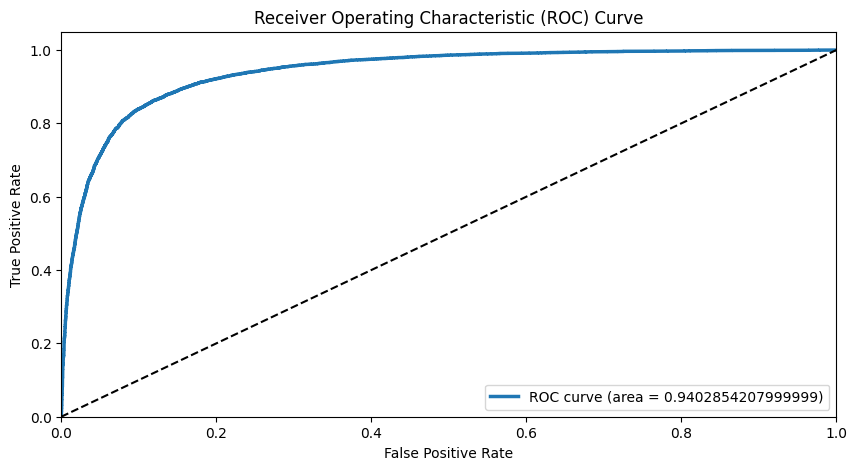

0.9402854207999999

In [80]:
evaluation.plot_roc(baseline_model, y_test, test_bow_features)

---

## 5. Classifying using K-Means

Let use tfidf features computed in last section as vector inputs for kmeans.

In [81]:
# TODO Complete in this cell: Train the k-means clustering model using `n_clusters=2`.
# Having the model trained, use it to make predictions on the test dataset.
# Assign the predictions to the variable `kmeans_predictions`, it will be used in the
# following cell to evaluate the model performance.

kmeans = KMeans(n_clusters=2)

kmeans.fit(train_bow_features)
print(f"Converged after {kmeans.n_iter_} iterations")
kmeans_predictions = kmeans.predict(test_bow_features)

c:\Users\Matías\.virtualenvs\Project_5-CBwJTSi2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Converged after 22 iterations


In [82]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    [1 - el for el in kmeans_predictions], y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.49852
Precision: 0.4973310435437389
Recall: 0.49852
F1 Score: 0.4356712497423295

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.50      0.16      0.25     12500
           0       0.50      0.83      0.62     12500

    accuracy                           0.50     25000
   macro avg       0.50      0.50      0.44     25000
weighted avg       0.50      0.50      0.44     25000


Prediction Confusion Matrix:
------------------------------
       0     1
0  10403  2097
1  10440  2060


In [83]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(test_bow_features, kmeans_predictions)
print("Silhouette Score:", silhouette_avg)

# Print the inertia
print("Inertia:", kmeans.inertia_)

Silhouette Score: 0.2680218448341474
Inertia: 4189091.8621833455


The silhouette score and inertia are metrics used to evaluate the performance of K-means clustering models.

1. Silhouette Score: The silhouette score measures how close each sample in one cluster is to samples in the neighboring clusters. It ranges from -1 to 1, where a higher value indicates better clustering results. 

   - A score close to 1 suggests that the samples within a cluster are well-clustered and far from samples in neighboring clusters.
   - A score close to 0 suggests overlapping clusters or that the samples are on or very close to the decision boundary between clusters.
   - A score close to -1 suggests that the samples may have been assigned to the wrong clusters.

   In your case, the silhouette score of 0.268 suggests that the clusters are somewhat separated, but there is some overlap or proximity between the samples in neighboring clusters.

2. Inertia: Inertia measures the sum of squared distances of samples to their closest cluster center. It provides a measure of how internally coherent the clusters are. A lower inertia value indicates tighter and more compact clusters.

   The inertia value of 4,189,091.862 suggests that the clusters have a relatively high dispersion, as the total sum of squared distances is relatively large.

It's important to note that these metrics should be used as a guide to evaluate the quality of clustering results. However, in the case of unsupervised learning like K-means clustering, there is no ground truth to compare against. Therefore, it's essential to interpret these metrics in conjunction with domain knowledge and consider the specific context and objectives of your analysis.

If you have any further questions, feel free to ask!

# Another way to do it with a pipeline

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode the labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Create a pipeline with TF-IDF vectorizer and k-means clustering
pipeline = make_pipeline(
    TfidfVectorizer(),
    KMeans(n_clusters=2)
)

# Train the model
pipeline.fit(X_train)

# Make predictions on the test set
kmeans_predictions = pipeline.predict(X_test)

# Decode the predicted labels
y_pred = label_encoder.inverse_transform(kmeans_predictions)


c:\Users\Matías\.virtualenvs\Project_5-CBwJTSi2\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
accuracy, precision, recall, f1_score = evaluation.get_performance(
    [1 - el for el in kmeans_predictions], y_test
)

Model Performance metrics:
------------------------------
Accuracy: 0.48264
Precision: 0.48228969712319913
Recall: 0.48264
F1 Score: 0.4800689919102627

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.48      0.41      0.44     12500
           0       0.48      0.55      0.52     12500

    accuracy                           0.48     25000
   macro avg       0.48      0.48      0.48     25000
weighted avg       0.48      0.48      0.48     25000


Prediction Confusion Matrix:
------------------------------
      0     1
0  6912  5588
1  7346  5154


---
## 6. Feature Engineering with Custom Word Embedding

### Tokenize reviews and train your own Word Embedding

You are going to have to train your own word embedding, for this we are going to use the __gensim__ library. The only requirement we ask of you is that the $vector\_size=100$.

[Here](https://radimrehurek.com/gensim/models/word2vec.html) you can read Gensim's Word2Vec documentation so you can train your own embedding, using the review data as a corpus.

As a previous step to training your word embedding you must tokenize the corpus, this may take a bit depending on the size of the dataset and the tokenizer we use, if you want you can try the NLTK tokenizer called `ToktokTokenizer`, which turns out to be a little faster (we hope that this recommendation does not bias your work, try and use the ones you want)

In [84]:
# TODO Complete in this cell: Tokenize your text corpus and use them to train
# a Word2Vec model.

tokenizer = ToktokTokenizer()

# TODO: Create and store here the tokenized train and test data.
tokenized_train = [tokenizer.tokenize(text) for text in norm_train_reviews]
tokenized_test = [tokenizer.tokenize(text) for text in norm_test_reviews]


# TODO: Train your Word2Vec model and assign it to `model_w2v`.
# The output model vector size (w2v_vector_size) is set by default to 100,
# you can change it if you want.
w2v_vector_size = 100
model_w2v = Word2Vec(tokenized_train, vector_size=w2v_vector_size, min_count=1, sg=1)

### Generate averaged word vector features

Once the embedding has been trained, we must use it. Remember that embedding will convert each word you pass to it into a vector of a given dimension (in our case $vector\_size=100$). So in order to obtain a vector for each review, you must average the vectors of all the words that are part of the same review.

The function must have the following form:
* `vectorizer(corpus, model, num_features=100)`


Where:
* `corpus:` corresponds to the entire dataset, in this way we obtain an average vector for each review, with a single call to the function.
* `model:` is your trained model.
* `num_features:` the dimension of the output vector of your embedding (remember that in our case we set this value to 100).

To do this you must complete the `vectorize` function of the `word2vec.py` module.

In [85]:
# TODO: Make sure you have completed the `vectorizer()` function from
# word2vec.py module.
# You don't need to change this code, just make it run without errors.
w2v_train_features = word2vec.vectorizer(
    corpus=tokenized_train, model=model_w2v, num_features=w2v_vector_size
)
w2v_test_features = word2vec.vectorizer(
    corpus=tokenized_test, model=model_w2v, num_features=w2v_vector_size
)

In [90]:
from gensim.models import Word2Vec
from nltk.tokenize import ToktokTokenizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Tokenize your text corpus
tokenizer = ToktokTokenizer()
tokenized_train = [tokenizer.tokenize(text) for text in norm_train_reviews]
tokenized_test = [tokenizer.tokenize(text) for text in norm_test_reviews]

# Train Word2Vec model
w2v_vector_size = 250
model_w2v = Word2Vec(tokenized_train, vector_size=w2v_vector_size, min_count=1, sg=1)

# Vectorize the data using Word2Vec
w2v_train_features = word2vec.vectorizer(corpus=tokenized_train, model=model_w2v, num_features=w2v_vector_size)
w2v_test_features = word2vec.vectorizer(corpus=tokenized_test, model=model_w2v, num_features=w2v_vector_size)

# Train Logistic Regression model
logreg_model = LogisticRegression(C=0.50, max_iter=300, random_state=0)
logreg_model.fit(w2v_train_features, y_train)

# Make predictions
logreg_predictions = logreg_model.predict(w2v_test_features)

# Evaluate the model
accuracy = accuracy_score(y_test, logreg_predictions)
precision = precision_score(y_test, logreg_predictions)
recall = recall_score(y_test, logreg_predictions)
f1 = f1_score(y_test, logreg_predictions)

print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Model Performance:
Accuracy: 0.8624
Precision: 0.8619945660859837
Recall: 0.86296
F1 Score: 0.8624770128727911


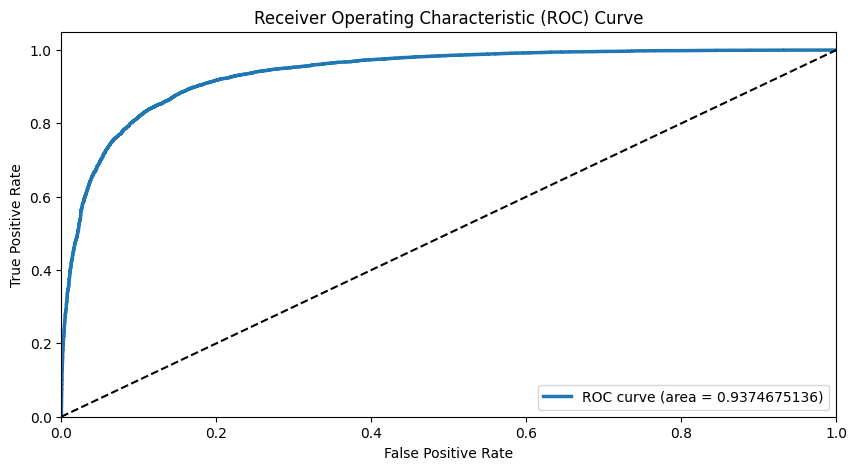

0.9374675136

In [91]:
evaluation.plot_roc(logreg_model, y_test, w2v_test_features)

### Modeling

Finally train a new model, it can be the same one you used before and compare the results you got using BoW/TF-IDF and Word2Vec.

In addition to training the model we ask you to show:

* `Accuracy`
* `Recall`
* `F1-Score`
* `Classification Report`
* `Confusion Matrix`
* `ROC Curve`
* `Obtain the ROC-AUC value (later we will do a small minimum performance check with this value)`

In [92]:
# TODO Complete in this cell: Train and choose the best model for the task.
# Assign this model to the `best_model` variable.
best_model = baseline_model.fit(train_bow_features, y_train)
predictions = best_model.predict(test_bow_features)


In [93]:
# TODO: Use the `get_performance()` function from `evaluation.py` module to show
# the model performance.
evaluation.get_performance(predictions, y_test)

Model Performance metrics:
------------------------------
Accuracy: 0.87088
Precision: 0.8708967491037547
Recall: 0.87088
F1 Score: 0.8708785422703909

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           1       0.87      0.87      0.87     12500
           0       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000


Prediction Confusion Matrix:
------------------------------
       0      1
0  10928   1572
1   1656  10844


(0.87088, 0.8708967491037547, 0.87088, 0.8708785422703909)

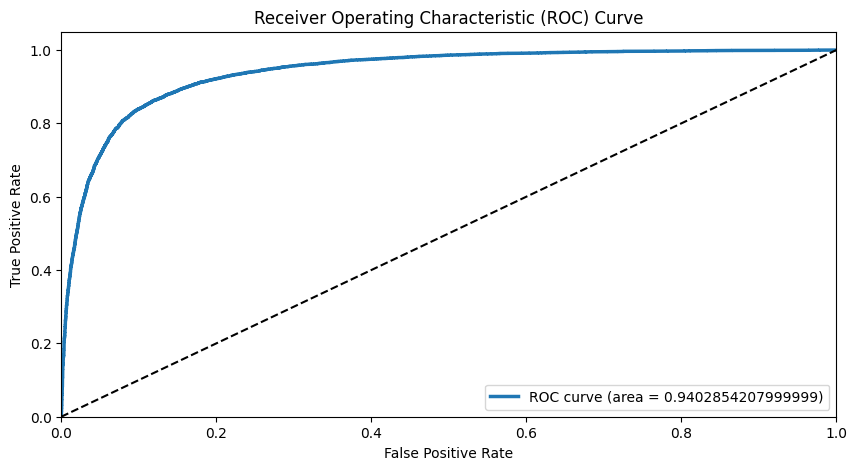

0.9402854207999999

In [94]:
# TODO: Use the `plot_roc()` function from `evaluation.py` module to show
# the model ROC curve.
evaluation.plot_roc(best_model, y_test, test_bow_features)

## 7. Predict data

- Take your best model
- Take `test data` (i.e. the dataset after doing the preprocessing and feature engineering part)
- Run the data through your model and save the predictions on the `positive` column in the `test` DataFrame (yeah that we've loaded at the very beginning of this notebook).
- You will have to use that model to fill values in the positive column using the model predictions
- Save the modified version of the DataFrame with the name (`dataset/movies_review_predict_aai.csv`) and don't forget to submit it alongside the rest of this sprint project code.

Let's say your best model is called `logistic_word2vec`, then your code should be exactly this:

```python
    from src import config
    from pathlib import Path
    DATASET_TEST_PREDICT = str(Path(config.DATASET_ROOT_PATH) / "movies_review_predict_aai.csv")
    test_preds = logistic_word2vec.predict_proba(w2v_test_features)[:, 1]
    test["positive"] = test_preds
    test.to_csv(DATASET_TEST_PREDICT, index=False)
```

In [95]:
prob = best_model.predict_proba(test_bow_features)
y_score = prob[:, prob.shape[1] - 1]

In [97]:
# TODO
from src import config
from pathlib import Path
DATASET_TEST_PREDICT = str(Path(config.DATASET_ROOT_PATH) / "movies_review_predict_aai.csv")
test_preds = y_score
test["positive"] = test_preds
test.to_csv(DATASET_TEST_PREDICT, index=False)

---
### OPTIONAL:

In our case, we train a word embedding from scratch, which is very good at an educational level, but when applying it to a real problem, we need a lot of data (which is not the case with our problem). Therefore, we invite you to investigate and use one of the `pre-trained Word2Vec models`.

If you look for the `Pretrained models` section in this [link](https://radimrehurek.com/gensim/models/word2vec.html), you will find information about the models that Gensim owns.

In [98]:
import gensim.downloader
glove_vectors = gensim.downloader.load('fasttext-wiki-news-subwords-300')

In [106]:
reload(word2vec)

w2v_train_features = word2vec.vectorizer_pre_trained(
    corpus=tokenized_train, model=glove_vectors, num_features=300
)
w2v_test_features = word2vec.vectorizer_pre_trained(
    corpus=tokenized_test, model=glove_vectors, num_features=300
)

In [127]:
# Create and train Logistic Regression model with the best parameters
logreg_model = LogisticRegression(
    C=10,
    max_iter=10000,
    random_state=4
)

logreg_model.fit(w2v_train_features, y_train)

# Make predictions
logreg_predictions = logreg_model.predict(w2v_test_features)

# Evaluate the model
accuracy = accuracy_score(y_test, logreg_predictions)
precision = precision_score(y_test, logreg_predictions)
recall = recall_score(y_test, logreg_predictions)
f1 = f1_score(y_test, logreg_predictions)

print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Model Performance:
Accuracy: 0.8396
Precision: 0.8422835026608612
Recall: 0.83568
F1 Score: 0.8389687575295157


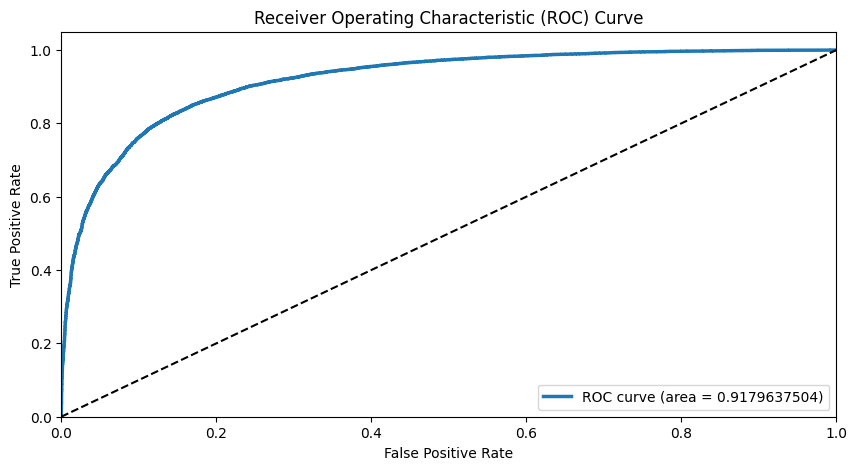

0.9179637504

In [128]:
evaluation.plot_roc(logreg_model, y_test, w2v_test_features)

In [129]:
import gensim.downloader
glove_vectors = gensim.downloader.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [130]:
reload(word2vec)

w2v_train_features = word2vec.vectorizer_pre_trained(
    corpus=tokenized_train, model=glove_vectors, num_features=300
)
w2v_test_features = word2vec.vectorizer_pre_trained(
    corpus=tokenized_test, model=glove_vectors, num_features=300
)

In [133]:
# Create and train Logistic Regression model with the best parameters
logreg_model = LogisticRegression(
    C=10,
    max_iter=10000,
    random_state=0
)

logreg_model.fit(w2v_train_features, y_train)

# Make predictions
logreg_predictions = logreg_model.predict(w2v_test_features)

# Evaluate the model
accuracy = accuracy_score(y_test, logreg_predictions)
precision = precision_score(y_test, logreg_predictions)
recall = recall_score(y_test, logreg_predictions)
f1 = f1_score(y_test, logreg_predictions)

print("Model Performance:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Model Performance:
Accuracy: 0.83348
Precision: 0.8329738797028516
Recall: 0.83424
F1 Score: 0.8336064590910907


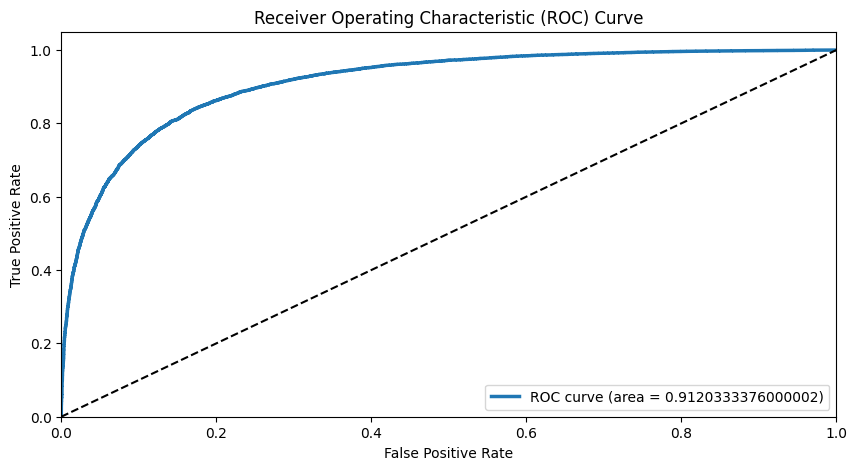

0.9120333376000002

In [134]:
evaluation.plot_roc(logreg_model, y_test, w2v_test_features)